# Procedure
1. Data import
2. Normarize & One-hot encording
3. Create Model
4. Deep Learning
5. Check history(Graph)
6. Evaluate

In [3]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

In [4]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


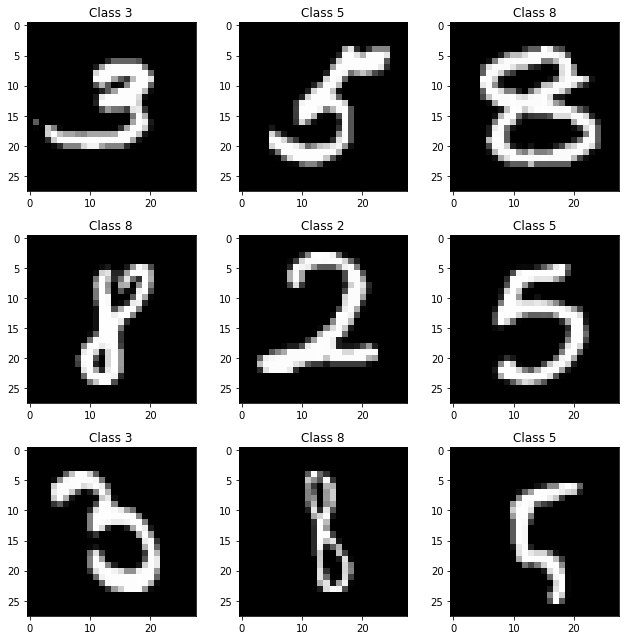

In [5]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [6]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[num])

0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0    0    0    2   18   46  136  136  244  255  241  103  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0   15   94  163  253  253  253  253  238  218  204   35  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0    0  131  253  253  253  253  237  200   57    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0

In [7]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [8]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

n_class = 10

model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_8 (Activation)    (None, 512)              

In [20]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_data=(X_test, Y_test))

Epoch 1/10
600/600 [==============================] - 5s 4ms/step - loss: 0.2214 - accuracy: 0.9328 - val_loss: 0.1127 - val_accuracy: 0.9646
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0896 - accuracy: 0.9723 - val_loss: 0.0814 - val_accuracy: 0.9757
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0590 - accuracy: 0.9815 - val_loss: 0.0834 - val_accuracy: 0.9749
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0468 - accuracy: 0.9846 - val_loss: 0.0849 - val_accuracy: 0.9768
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0406 - accuracy: 0.9872 - val_loss: 0.0808 - val_accuracy: 0.9766
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0316 - accuracy: 0.9898 - val_loss: 0.0747 - val_accuracy: 0.9799
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.0828 - val_accuracy: 0.9792
Epoch 

In [21]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0131 - accuracy: 0.9958
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0143 - accuracy: 0.9959
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0119 - accuracy: 0.9963
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0125 - accuracy: 0.9964


In [22]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0852 - accuracy: 0.9814
Test score: 0.08521876484155655
Test accuracy: 0.9814000129699707


In [28]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predict_prob=model.predict(X_test)
predict_classes=np.argmax(predict_prob,axis=1)

predicted_classes = predict_classes

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

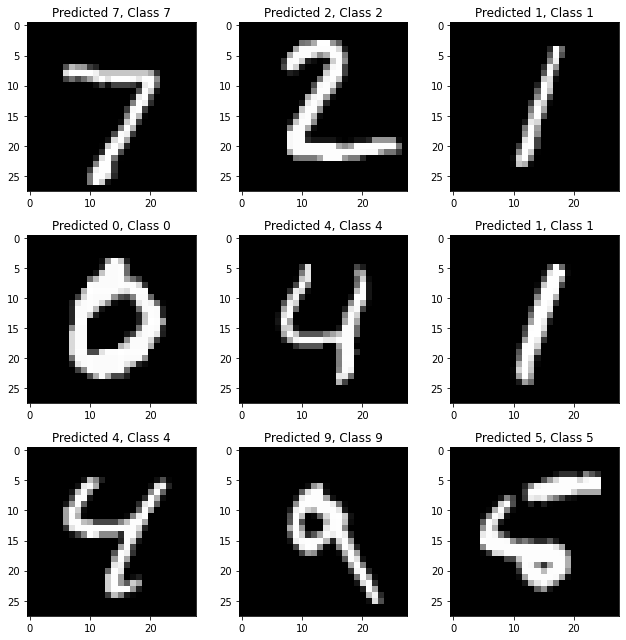

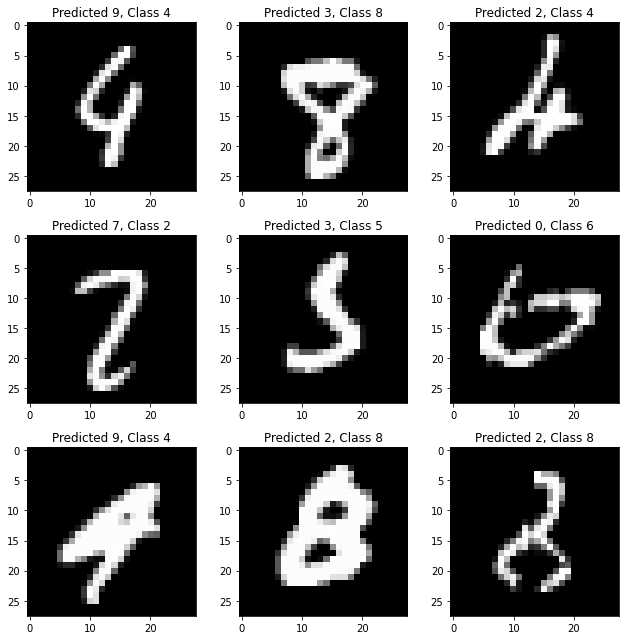

In [29]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

# More Deeper

In [32]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
#from keras.layers.normalization import BatchNormalization
from keras.layers import BatchNormalization

In [41]:
# Reload the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [42]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [43]:
# one-hot format classes

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [57]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_20 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_40 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_21 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_41 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)      

In [45]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [46]:
# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch

# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [47]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 28s 3ms/step - loss: 2.3035 - accuracy: 0.1350
Test score: 2.303457260131836
Test accuracy: 0.13500000536441803


In [48]:
from keras import backend as K

# choose any image to want by specifying the index
img = X_test[3]
img = np.expand_dims(img, axis=0) # Keras requires the image to be in 4D, so we add an extra dimension to it.

# Not important to understand how this function work -- It just plots a convolution layer

def visualize(layer):
    inputs = [K.learning_phase()] + model.inputs
    
    _convout1_f = K.function(inputs, [layer.output])
    
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    m = convolutions.shape[2]
    n = int(np.ceil(np.sqrt(m)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(15,12))
    for i in range(m):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[:,:,i], cmap='gray')


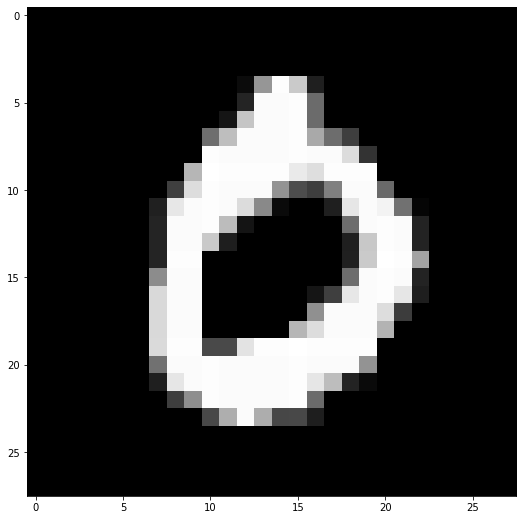

In [49]:
plt.figure()
plt.imshow(X_test[3].reshape(28,28), cmap='gray', interpolation='none')

In [51]:
visualize(convLayer01) # visualize first set of feature maps

NameError: ignored

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
#Google DriveからColabにコピーして解凍するやり方
!cp "/content/drive/My Drive/04_Google Colaboratory/210818_手描き文字認識/train.zip" .
!cp "/content/drive/My Drive/04_Google Colaboratory/210818_手描き文字認識/test.zip" .
#!unzip "/content/drive/MyDrive/04_Google Colaboratory/210818_手描き文字認識/train.zip"
#!unzip "/content/drive/MyDrive/04_Google Colaboratory/210818_手描き文字認識/test.zip"

In [65]:
!unzip "/content/train.zip"
!unzip "/content/test.zip"

ストリーミング出力は最後の 5000 行に切り捨てられました。
 extracting: test/test_5499.jpg      
 extracting: test/test_55.jpg        
 extracting: test/test_550.jpg       
 extracting: test/test_5500.jpg      
 extracting: test/test_5501.jpg      
 extracting: test/test_5502.jpg      
 extracting: test/test_5503.jpg      
 extracting: test/test_5504.jpg      
 extracting: test/test_5505.jpg      
 extracting: test/test_5506.jpg      
 extracting: test/test_5507.jpg      
 extracting: test/test_5508.jpg      
 extracting: test/test_5509.jpg      
 extracting: test/test_551.jpg       
 extracting: test/test_5510.jpg      
 extracting: test/test_5511.jpg      
 extracting: test/test_5512.jpg      
 extracting: test/test_5513.jpg      
 extracting: test/test_5514.jpg      
 extracting: test/test_5515.jpg      
 extracting: test/test_5516.jpg      
 extracting: test/test_5517.jpg      
 extracting: test/test_5518.jpg      
 extracting: test/test_5519.jpg      
 extracting: test/test_552.jpg       
 extracting: test/

In [66]:
!ls

drive  sample_data  test  test.zip  train  train.zip


In [67]:
import matplotlib.pyplot as plt
import os
import cv2
import glob
import numpy as np

In [162]:
from natsort import natsorted

#階層移動
os.chdir("/content/train")
#階層内のPathを全取得
path_train = natsorted(glob.glob("*"))
print(path_train)

['train_0.jpg', 'train_1.jpg', 'train_2.jpg', 'train_3.jpg', 'train_4.jpg', 'train_5.jpg', 'train_6.jpg', 'train_7.jpg', 'train_8.jpg', 'train_9.jpg', 'train_10.jpg', 'train_11.jpg', 'train_12.jpg', 'train_13.jpg', 'train_14.jpg', 'train_15.jpg', 'train_16.jpg', 'train_17.jpg', 'train_18.jpg', 'train_19.jpg', 'train_20.jpg', 'train_21.jpg', 'train_22.jpg', 'train_23.jpg', 'train_24.jpg', 'train_25.jpg', 'train_26.jpg', 'train_27.jpg', 'train_28.jpg', 'train_29.jpg', 'train_30.jpg', 'train_31.jpg', 'train_32.jpg', 'train_33.jpg', 'train_34.jpg', 'train_35.jpg', 'train_36.jpg', 'train_37.jpg', 'train_38.jpg', 'train_39.jpg', 'train_40.jpg', 'train_41.jpg', 'train_42.jpg', 'train_43.jpg', 'train_44.jpg', 'train_45.jpg', 'train_46.jpg', 'train_47.jpg', 'train_48.jpg', 'train_49.jpg', 'train_50.jpg', 'train_51.jpg', 'train_52.jpg', 'train_53.jpg', 'train_54.jpg', 'train_55.jpg', 'train_56.jpg', 'train_57.jpg', 'train_58.jpg', 'train_59.jpg', 'train_60.jpg', 'train_61.jpg', 'train_62.jpg', '

In [163]:
#データセットを格納する変数
train = []
#リサイズ後のサイズ
IMG_SIZE = 28

#個別のFilePathに対して処理していきます。
for p in path_train:
   pathEach = p
   #print(pathEach)

#NumPy配列ndarrayとして読み込まれ、ndarrayを画像として保存
   imageTTTT = cv2.imread(pathEach,cv2.IMREAD_GRAYSCALE)
   #img_resize_array = cv2.resize(imageTTTT, (IMG_SIZE, IMG_SIZE))
   #train.append(img_resize_array)
   train.append(imageTTTT)

In [164]:
#階層移動
os.chdir("/content/test")
#階層内のPathを全取得
path_test = natsorted(glob.glob("*"))

In [165]:
#データセットを格納する変数
test = []
#リサイズ後のサイズ
IMG_SIZE = 28

#個別のFilePathに対して処理していきます。
for p in path_test:
   pathEach = p
   #print(pathEach)

#NumPy配列ndarrayとして読み込まれ、ndarrayを画像として保存
   imageTTTT = cv2.imread(pathEach,cv2.IMREAD_GRAYSCALE)
   #img_resize_array = cv2.resize(imageTTTT, (IMG_SIZE, IMG_SIZE))
   #test.append(img_resize_array)
   test.append(imageTTTT)

In [156]:
train[0].shape

(28, 28)

In [157]:
print("train data", len(train))
print("test data", len(test))

train data 60000
test data 10000


In [75]:
os.chdir("/content")
!cp "/content/drive/My Drive/04_Google Colaboratory/210818_手描き文字認識/train_master.tsv" .
!cp "/content/drive/My Drive/04_Google Colaboratory/210818_手描き文字認識/sample_submit.tsv" .

In [76]:
import pandas as pd
train_master = pd.read_csv("/content/train_master.tsv", sep='\t')

In [77]:
train_master.head(10)

,file_name,category_id
0,train_0.jpg,5
1,train_1.jpg,0
2,train_2.jpg,4
3,train_3.jpg,1
4,train_4.jpg,9
5,train_5.jpg,2
6,train_6.jpg,1
7,train_7.jpg,3
8,train_8.jpg,1
9,train_9.jpg,4


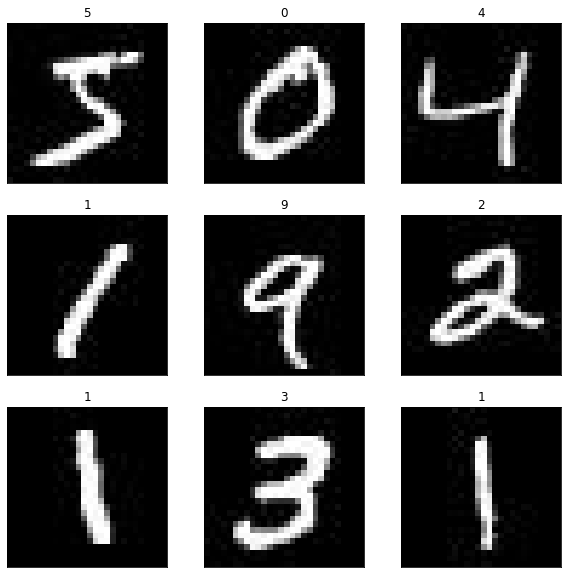

In [166]:
#plt.subplots(figsize=(3,3))


plt.figure(figsize=(10,10))

for i in range(9):
  #cifar_img = plt.subplot(3,3, i+1)
  plt.subplot(3,3, i+1)
  plt.imshow(train[i].reshape(28,28),cmap='gray', interpolation='none')
  label = train_master["category_id"][i]
  plt.title(label)
  plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False) 

In [167]:
print(type(train))

<class 'list'>


In [168]:
train = np.array(train)
test = np.array(test)

train = train.reshape((train.shape[0], 28, 28, 1))
test = test.reshape((test.shape[0], 28, 28, 1))

train = train.astype('float32')      
test = test.astype('float32')

print(train.shape)
print(test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


(28, 28, 1)


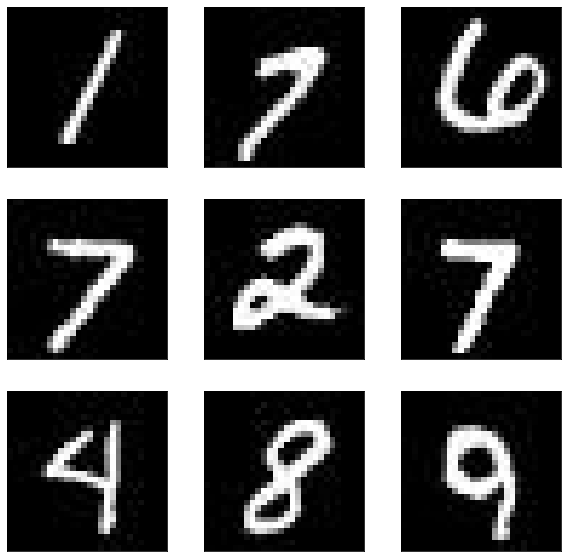

In [169]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split


print(train[0].shape)

#mnist_labels = np.array(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

n_image = 9
rand_id = np.random.randint(0, len(train), n_image)


plt.figure(figsize=(10,10))

for i in range(n_image):
  #cifar_img = plt.subplot(3,3, i+1)
  plt.subplot(3,3, i+1)
  plt.imshow(train[rand_id[i]].reshape(28,28),cmap='gray', interpolation='none')
  #label = train[rand_id[i]]["category_id"]
  #plt.title(label)
  plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False) 



In [170]:
x = train
t = train_master["category_id"]

#x = np.array(x)
#t = np.array(t)

In [171]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

In [172]:
from keras.utils import np_utils

t_train = np_utils.to_categorical(t_train)
t_test = np_utils.to_categorical(t_test)
print(t_train[:10])

x_train = x_train / 255
x_test = x_test / 255

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [173]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

n_class = 10

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))  # ドロップアウト
model.add(Dense(n_class))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_64 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_65 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_66 (Activation)   (None, 13, 13, 64)      

In [175]:
history = model.fit(x_train, t_train, epochs=20, batch_size=100, validation_data=(x_test, t_test))

Epoch 1/20
450/450 [==============================] - 4s 8ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0305 - val_accuracy: 0.9915
Epoch 2/20
450/450 [==============================] - 4s 8ms/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.0270 - val_accuracy: 0.9924
Epoch 3/20
450/450 [==============================] - 3s 7ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0315 - val_accuracy: 0.9913
Epoch 4/20
450/450 [==============================] - 3s 7ms/step - loss: 0.0105 - accuracy: 0.9965 - val_loss: 0.0332 - val_accuracy: 0.9913
Epoch 5/20
450/450 [==============================] - 3s 7ms/step - loss: 0.0102 - accuracy: 0.9966 - val_loss: 0.0325 - val_accuracy: 0.9915
Epoch 6/20
450/450 [==============================] - 4s 8ms/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0.0321 - val_accuracy: 0.9909
Epoch 7/20
450/450 [==============================] - 3s 7ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0319 - val_accuracy: 0.9923
Epoch 

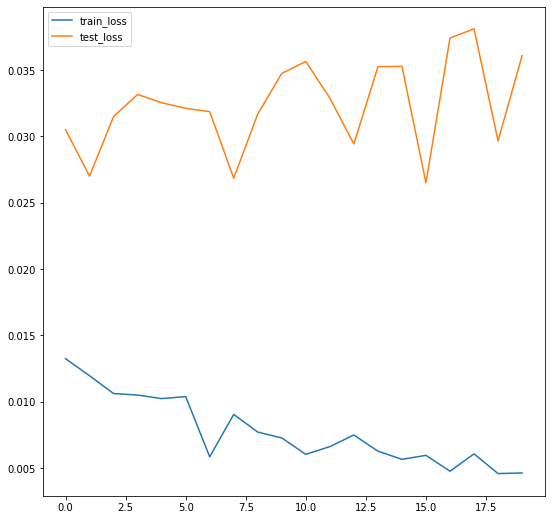

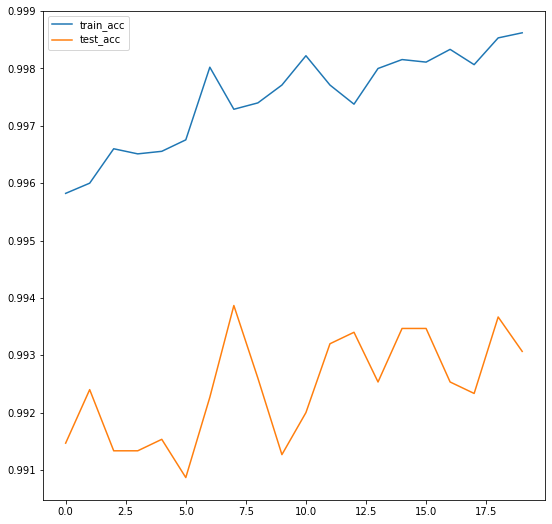

In [176]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]

plt.plot(np.arange(len(train_loss)), train_loss, label="train_loss")
plt.plot(np.arange(len(test_loss)), test_loss, label="test_loss")
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label="train_acc")
plt.plot(np.arange(len(train_acc)), test_acc, label="test_acc")
plt.legend()
plt.show()

In [178]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

469/469 [==============================] - 2s 4ms/step - loss: 0.0361 - accuracy: 0.9931
0.036086808890104294 0.993066668510437


In [198]:
sample_submit = pd.read_csv("/content/sample_submit.tsv", sep='\t', header=None)

In [199]:
sample_submit.head()

,0,1
0,test_0.jpg,2
1,test_1.jpg,4
2,test_2.jpg,5
3,test_3.jpg,4
4,test_4.jpg,3


In [200]:
pred = model.predict(test)
pred_num = np.argmax(pred, axis=1)

In [204]:
sample_submit[1] = pred_num 

In [206]:
os.chdir("/content")

In [214]:
sample_submit.to_csv("submit01.tsv", sep='\t', index=None,header=None)